# Loss Probability Across Investment Horizons


## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")
from risk_analysis.data import load_price_history, compute_log_returns
from risk_analysis.portfolio import bootstrap_loss_probabilities

%matplotlib inline

## Load data and compute portfolio returns

In [2]:
prices = load_price_history('cleaned_adj_close_data.xlsx')
_, returns = compute_log_returns(prices)
portfolio_returns = returns.mean(axis=1)
portfolio_returns.head()

Date
2014-01-03   -0.007704
2014-01-06   -0.000345
2014-01-07    0.011124
2014-01-08    0.000738
2014-01-09   -0.012065
dtype: float64

## Bootstrap probability of a 5% loss

In [3]:
probabilities = bootstrap_loss_probabilities(
    returns,
    loss_threshold=-0.05,
    max_horizon=50,
    n_bootstrap=5000,
)
probabilities.head()

,Bootstrapped,Gaussian
1,0.0060,0.000361
2,0.0128,0.007409
3,0.0266,0.021327
4,0.0428,0.036896
5,0.0516,0.051748


## Visual comparison

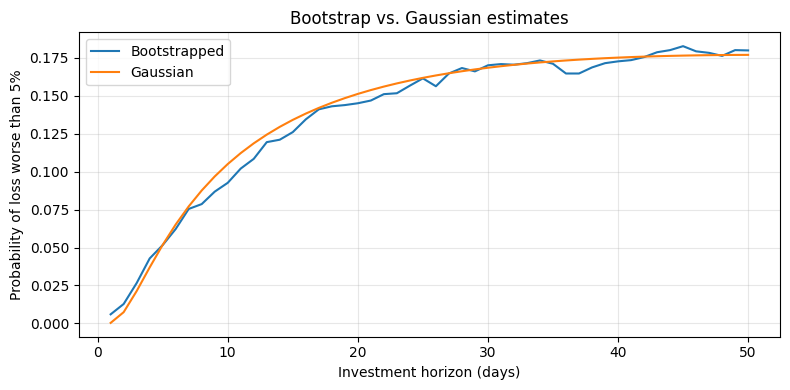

In [4]:
ax = probabilities.plot(figsize=(8, 4))
ax.set_xlabel('Investment horizon (days)')
ax.set_ylabel('Probability of loss worse than 5%')
ax.set_title('Bootstrap vs. Gaussian estimates')
ax.grid(True, alpha=0.3)
plt.tight_layout()

## Error metrics

In [5]:
comparison = probabilities.dropna(axis=0, how='any')
diff = comparison['Bootstrapped'] - comparison['Gaussian']
mae = diff.abs().mean()
rmse = (diff.pow(2).mean()) ** 0.5
print(f'MAE: {mae:.6f}')
print(f'RMSE: {rmse:.6f}')

MAE: 0.004239
RMSE: 0.005305
